# Analisis estadistico del data set medicamentos vencidos

In [1]:
import creacion_y_lectura
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = creacion_y_lectura.df      # data frame reducido (data frame original = 152000 filas)

In [4]:
df.head()

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,expedientecum,consecutivocum,cantidadcum,...,concentracion,principioactivo,unidadmedida,cantidad,unidadreferencia,formafarmaceutica,nombrerol,tiporol,modalidad,IUM
0,202757,TROPHAMINE® AMINOACIDOS AL 10%,B. BRAUN MEDICAL INC,INVIMA 2008 M-010897 R1,01/10/2000,23/10/2018,Vencido,202757,1,500.0,...,A,ARGININA USP,g,120000.0,100 ML,SOLUCION INYECTABLE,B. BRAUN MEDICAL S.A.,IMPORTADOR,IMPORTAR Y VENDER,NaN
1,19906439,VITAFULL MEN MK TABLETAS,TECNOQUIMICAS S.A.,INVIMA M-014822,11/09/2000,23/11/2010,Vencido,19906439,2,60.0,...,A,MONONITRATO DE TIAMINA (2.475 MG) EQUIVALENTE ...,mg,225000.0,TABLETA,TABLETA,GENERAL NUTRITION INTERNATIONAL INC,FABRICANTE,IMPORTAR Y VENDER,NaN
2,57687,LOVASTATINA TABLETAS 20 MG.,GENFAR S.A.,INVIMA 2016M-003810-R2,19/01/1996,10/01/2021,Vencido,57687,10,420.0,...,A,LOVASTATINA,mg,2000000.0,TABLETA,TABLETA,FAREVA VILLA RICA S.A.S.,FABRICANTE,FABRICAR Y VENDER,NaN
3,27242,LACRILUBE®UNGÜENTO OFTALMICO,ALLERGAN INC.,INVIMA M-009017-R1,05/07/1998,05/12/2008,Vencido,27242,1,3.5,...,D,ACEITE MINERIAL. USP,g,4250000.0,100 G DE UNGÜENTO OFTÁLMICO,UNGUENTO OFTALMICO,ALLERGANWACO.TEXAS,FABRICANTE,IMPORTAR Y VENDER,NaN
4,28823,KETOCONAZOL TABLETAS 200 MG,GENFAR S.A.,INVIMA 2008M-010168-R1,19/02/1998,06/11/2018,Vencido,28823,4,100.0,...,A,KETOCONAZOL,mg,20000000.0,TABLETA,TABLETA,GENFAR S.A.,FABRICANTE,FABRICAR Y VENDER,NaN


El presente grupo de datos contiene informacion sobre medicamentos vencidos y su codigo unico proporcionados por parte del invima

Descripcion:  

expediente = Número del expediente asociado al registro sanitario

producto = Nombre del producto

titular = Nombre del titular del registro sanitario

registrosanitario = Número del registro sanitario o notificación sanitaria

fechaexpedicion = Fecha de expedición del registro sanitario

fechavencimiento = Fecha de vencimiento del registro sanitario

estadoregistro = Estado del registro sanitario

expedientecum = Número del expediente del Código Único de Medicamentos

consecutivocum = Número del consecutivo del Código único de Medicamentos

cantidadcum = Cantidad de medicamento por la presentación que se registra

descripcioncomercial = Descripción del CUM

estadocum = Estado actual del CUM

fechaactivo = Fecha de activación del código CUM

fechainactivo = Fecha en al que queda inactivo el código CUM

muestramedica = Indica si la presentación comercial es es una muestra medica

unidad = Unidad de medida del medicamento

atc = Código ATC

descripcionatc = Descripción de ATC

viaadministracion = Vía de administración del medicamento

concentracion = Cantidad de principio activo expresada por peso o por volumen, de acuerdo con la naturaleza de la forma farmacéutica.

principioactivo = Descripción del principio activo

unidadmedida = Unidad de medida del principio activo

cantidad = Cantidad del principio activo

unidadreferencia = Unidad de forma farmacéutica

formafarmaceutica = Indica la forma de presentar los medicamentos

nombrerol = Nombre del rol asociado al registro sanitario

tiporol = Tipo de rol asociado al registro sanitario (fabricante, apoderado, envasador, etc.…)

modalidad = Forma como se realizara , importara o comercializará el producto

IUM = Identificador Único de Medicamento

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   expediente            500 non-null    int64  
 1   producto              500 non-null    object 
 2   titular               500 non-null    object 
 3   registrosanitario     500 non-null    object 
 4   fechaexpedicion       500 non-null    object 
 5   fechavencimiento      500 non-null    object 
 6   estadoregistro        500 non-null    object 
 7   expedientecum         500 non-null    int64  
 8   consecutivocum        500 non-null    int64  
 9   cantidadcum           500 non-null    float64
 10  descripcioncomercial  500 non-null    object 
 11  estadocum             500 non-null    object 
 12  fechaactivo           500 non-null    object 
 13  fechainactivo         497 non-null    object 
 14  muestramedica         500 non-null    object 
 15  unidad                5

In [38]:
df.shape

(500, 29)

Data set de 29 columnas, 3 flotantes, 3 enteros, y 23 categoricos

In [40]:
df.isnull().sum()

expediente                0
producto                  0
titular                   0
registrosanitario         0
fechaexpedicion           0
fechavencimiento          0
estadoregistro            0
expedientecum             0
consecutivocum            0
cantidadcum               0
descripcioncomercial      0
estadocum                 0
fechaactivo               0
fechainactivo             3
muestramedica             0
unidad                    0
atc                       0
descripcionatc            0
viaadministracion         0
concentracion             0
principioactivo           0
unidadmedida              0
cantidad                  0
unidadreferencia          2
formafarmaceutica         0
nombrerol                 0
tiporol                   0
modalidad                 0
IUM                     500
dtype: int64

La variable "fechainactivo" tiene 3 valores nulos, "unidadreferencia" 2 valores nulos y la variable "IUM" todos sus valores son nulos

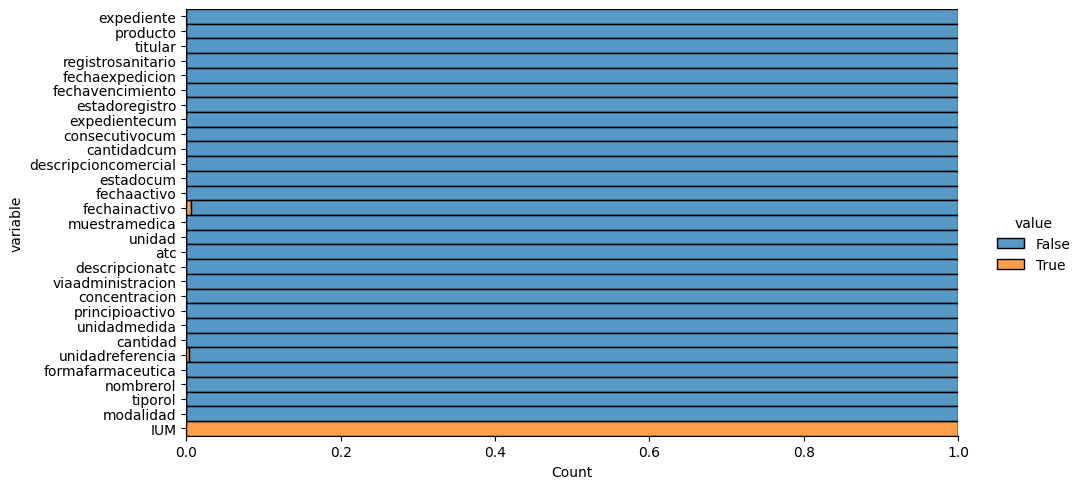

In [41]:
df.isnull().melt().pipe(lambda df : (sns.displot(data=df, y="variable", hue="value", multiple="fill", aspect=2)));

Visualizacion de la relevacia y presencia de los datos nulos en cada variable

In [43]:
# Procedemos con la eliminacion de la columna IUM ya que no aporta nada de informacion al dataset

df_2= df.drop("IUM", axis=1)
df_2.head()

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,expedientecum,consecutivocum,cantidadcum,...,viaadministracion,concentracion,principioactivo,unidadmedida,cantidad,unidadreferencia,formafarmaceutica,nombrerol,tiporol,modalidad
0,202757,TROPHAMINE® AMINOACIDOS AL 10%,B. BRAUN MEDICAL INC,INVIMA 2008 M-010897 R1,01/10/2000,23/10/2018,Vencido,202757,1,500.0,...,PARENTERAL,A,ARGININA USP,g,120000.0,100 ML,SOLUCION INYECTABLE,B. BRAUN MEDICAL S.A.,IMPORTADOR,IMPORTAR Y VENDER
1,19906439,VITAFULL MEN MK TABLETAS,TECNOQUIMICAS S.A.,INVIMA M-014822,11/09/2000,23/11/2010,Vencido,19906439,2,60.0,...,ORAL,A,MONONITRATO DE TIAMINA (2.475 MG) EQUIVALENTE ...,mg,225000.0,TABLETA,TABLETA,GENERAL NUTRITION INTERNATIONAL INC,FABRICANTE,IMPORTAR Y VENDER
2,57687,LOVASTATINA TABLETAS 20 MG.,GENFAR S.A.,INVIMA 2016M-003810-R2,19/01/1996,10/01/2021,Vencido,57687,10,420.0,...,ORAL,A,LOVASTATINA,mg,2000000.0,TABLETA,TABLETA,FAREVA VILLA RICA S.A.S.,FABRICANTE,FABRICAR Y VENDER
3,27242,LACRILUBE®UNGÜENTO OFTALMICO,ALLERGAN INC.,INVIMA M-009017-R1,05/07/1998,05/12/2008,Vencido,27242,1,3.5,...,CONJUNTIVAL,D,ACEITE MINERIAL. USP,g,4250000.0,100 G DE UNGÜENTO OFTÁLMICO,UNGUENTO OFTALMICO,ALLERGANWACO.TEXAS,FABRICANTE,IMPORTAR Y VENDER
4,28823,KETOCONAZOL TABLETAS 200 MG,GENFAR S.A.,INVIMA 2008M-010168-R1,19/02/1998,06/11/2018,Vencido,28823,4,100.0,...,ORAL,A,KETOCONAZOL,mg,20000000.0,TABLETA,TABLETA,GENFAR S.A.,FABRICANTE,FABRICAR Y VENDER


Ya que eliminamos toda la columna con valores nulos podemos elimnar las filas que posean valores nulos, al ser estas tan pocas (5 filas) respesto a las 500 filas podemos hacerlo, ya que el analisis no se vera muy afectado

In [45]:
df_final = df_2.dropna()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 499
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   expediente            495 non-null    int64  
 1   producto              495 non-null    object 
 2   titular               495 non-null    object 
 3   registrosanitario     495 non-null    object 
 4   fechaexpedicion       495 non-null    object 
 5   fechavencimiento      495 non-null    object 
 6   estadoregistro        495 non-null    object 
 7   expedientecum         495 non-null    int64  
 8   consecutivocum        495 non-null    int64  
 9   cantidadcum           495 non-null    float64
 10  descripcioncomercial  495 non-null    object 
 11  estadocum             495 non-null    object 
 12  fechaactivo           495 non-null    object 
 13  fechainactivo         495 non-null    object 
 14  muestramedica         495 non-null    object 
 15  unidad                495 no

Ahora tenemos 495 filas, ninguna nula, en 28 variables

## Analisis estadistico

In [48]:
df_final.describe()

,expediente,expedientecum,consecutivocum,cantidadcum,cantidad
count,4.950000e+02,4.950000e+02,495.000000,495.000000,4.950000e+02
mean,1.221778e+07,1.221778e+07,4.856566,313.376869,1.526106e+09
std,9.668540e+06,9.668540e+06,6.380451,2340.424093,2.339913e+10
min,4.958000e+03,4.958000e+03,1.000000,1.000000,1.120000e-03
25%,2.150830e+05,2.150830e+05,1.000000,10.000000,4.000000e+05
50%,1.991687e+07,1.991687e+07,3.000000,30.000000,3.000000e+06
75%,1.997435e+07,1.997435e+07,6.000000,100.000000,2.000000e+07
max,2.014257e+07,2.014257e+07,68.000000,50000.000000,5.000000e+11


In [58]:
des = df_final.describe(include="object")
des

,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,estadoregistro,descripcioncomercial,estadocum,fechaactivo,fechainactivo,...,descripcionatc,viaadministracion,concentracion,principioactivo,unidadmedida,unidadreferencia,formafarmaceutica,nombrerol,tiporol,modalidad
count,495,495,495,495,495,495,495,495,495,495,...,495,495,495,495,495,495,495,495,495,495
unique,424,245,425,343,364,1,479,2,184,370,...,236,18,7,404,15,163,44,272,2,5
top,CENTRUM CON LUTEINA.,PFIZER S.A.S.,INVIMA 2011M-0000831-R1,01/01/1999,10/01/2021,Vencido,CAJA POR 10 TABLETAS,Inactivo,11/10/2006,10/01/2021,...,MULTIVITAMINAS Y OTROS MINERALES INCL COMBINAC...,ORAL,A,ACETAMINOFEN,mg,TABLETA,TABLETA,LABORATORIO FRANCO COLOMBIANO - LAFRANCOL S.A.S.,FABRICANTE,IMPORTAR Y VENDER
freq,10,26,10,46,21,495,3,494,274,17,...,70,329,365,6,335,113,114,16,346,258


El data frame cuenta con columnas de numeros de regristo netamente utilizadas en el area de la salud, de poco interes para este analisis, por tanto nos centraremos solo en las siguentes variables: producto, titular, fechaexpedicion, fechavencimiento, cantidadcum, unidad, viaadministracion, concentracion, principioactivo, unidadmedida, cantidad, unidadreferencia, formafarmaceutica, tiporol, modalidad

## Analisis univariado

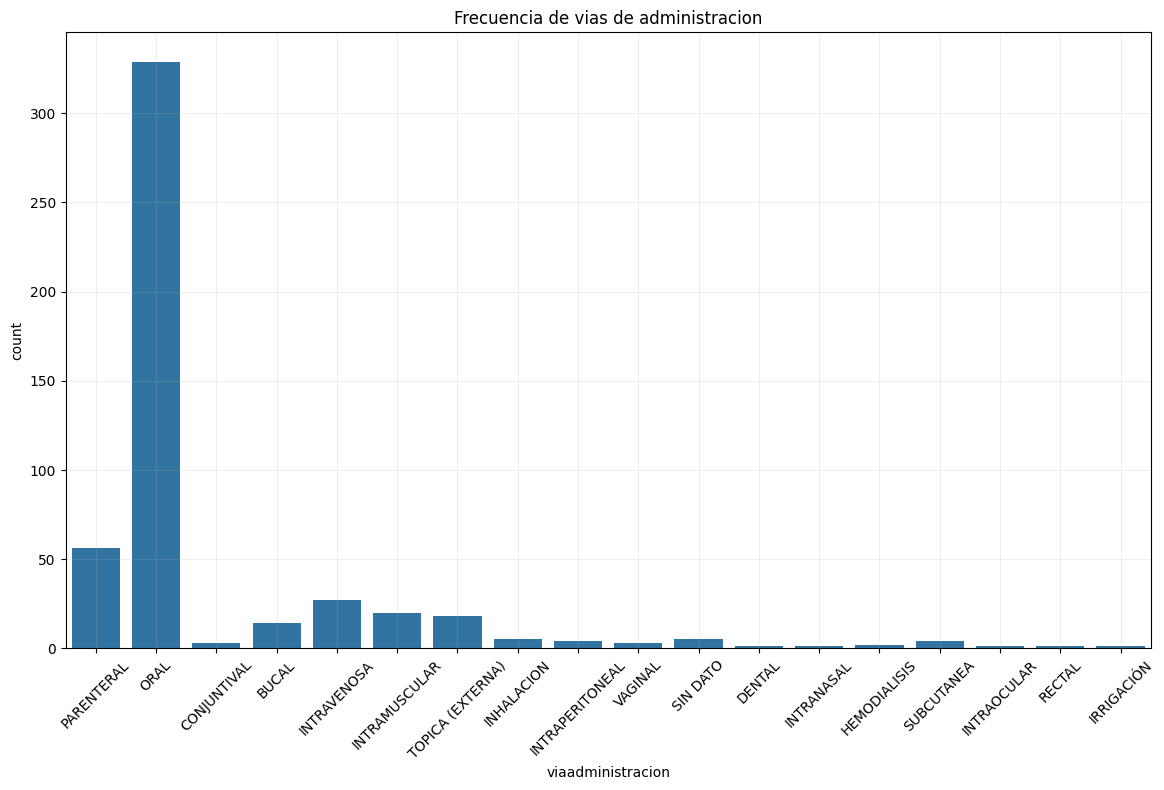

In [140]:
plt.figure(figsize=(14,8))
sns.countplot(data=df_final, x="viaadministracion", );
plt.xticks(rotation=45);
plt.grid(alpha=0.2)
plt.title("Frecuencia de vias de administracion");

En esta visualizacion observamos que la via de administracion mas comun del data set es la oral, con mucha diferencia de las demas tenien mas de 300 conteos, seguida por la via perenteral con poco mas de 50 conteos, las demas vias de administracion tienen menos de 25 conteos 

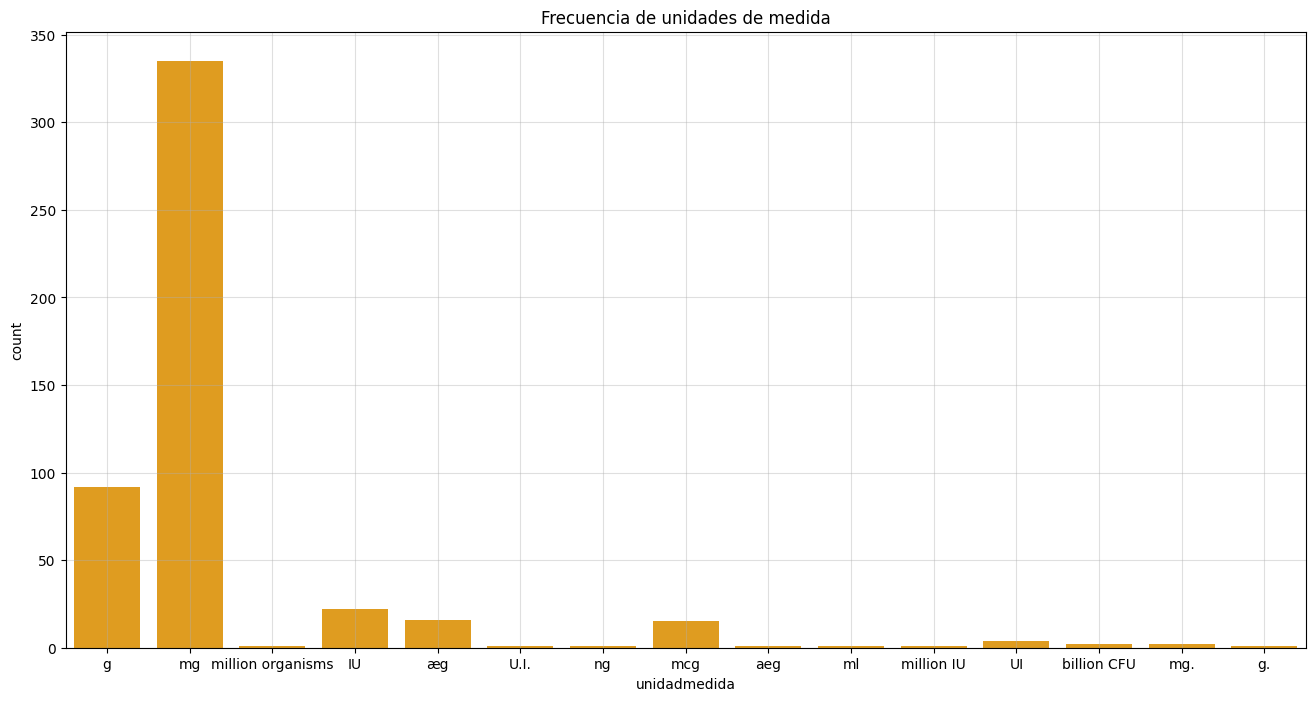

In [138]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_final, x="unidadmedida", color="orange");
plt.grid(alpha=0.4)
plt.title("Frecuencia de unidades de medida");

En esta visualizacion notamos que la cantidad de presentacion de los medicamentos es en su gran mayoria mg con mas de 300 conteos, seguida por los gramos con casi 100 conteos, las demas presentaciones nuevamente tienen menos de 25 conteos siendo muy poco frecuentes, tambien la podemos representar con un grafico de pastel aunque al tener tantas variables y muchas de poco porcentaje, el grafico seria dificil de visualizar

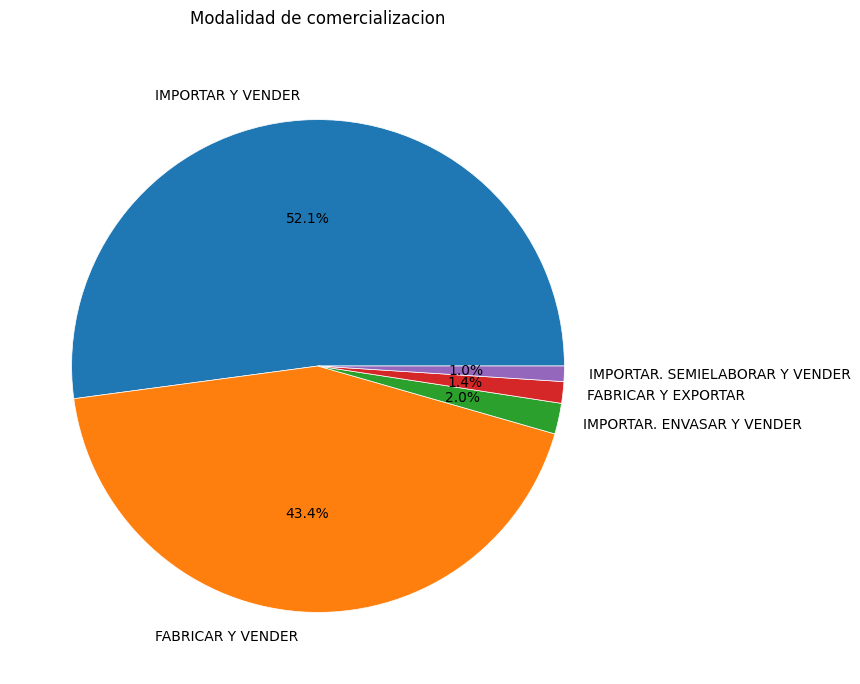

In [136]:
plt.figure(figsize=(10,8))
plt.pie(df_final.modalidad.value_counts().values, labels=df_final.modalidad.unique(),  autopct="%1.1f%%", wedgeprops={'edgecolor': 'w', 'linewidth': 0.5});
plt.title("Modalidad de comercializacion", pad=25);

En este grafico podemos observar que la modalidad principal de distribucion de los medicamentos es importar y vender con un 52%, seguida de un 43% de fabricar y vender, las demas modalidades presentan muy poco porcentaje en el dataset